# scTensor

**Language:** R

**Paper:** Tsuyuzaki, K., M. Ishii, and I. Nikaido, Uncovering hypergraphs of cell-cell interaction from single cell RNA-sequencing data. bioRxiv, 2019.

**Code Resource:** https://bioconductor.org/packages/devel/bioc/vignettes/scTensor/inst/doc/scTensor.html

**Claiming:** Inference of intercellular (including paracrine/autocrine) signaling networks

**Method:** Tensor decomposition

**Database:** A framework as multiple R/Bioconductor annotation packages for sustainable maintenance (LRBaseDbi and LRBase.XXX.eg.db-type packages, and XXX is the abbreviation of the scientific name of organisms such as LRBase.Hsa.eg.db for L-R database of Homo sapiens


## Input
1. scRNA-seq data: gene-expression matrix with rows as genes and columns as cells (recommended with dimentionality reduction information)
2. cell type annotation

Here, we use the scRNA-Seq dataset of male germline cells and somatic cells GSE86146 as demo data. For saving the package size, the number of genes is strictly reduced by the standard of highly variable genes with a threshold of the p-value are 1E-150 (cf. Identifying highly variable genes). 

## Installation

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
# The following initializes usage of Bioc devel
BiocManager::install(version='devel')
BiocManager::install("scTensor")
BiocManager::install("LRBase.Hsa.eg.db")
BiocManager::install("MeSH.Hsa.eg.db")

In [5]:
library(LRBase.Hsa.eg.db)
library(MeSH.Hsa.eg.db)
library(scTensor)
library(SingleCellExperiment)

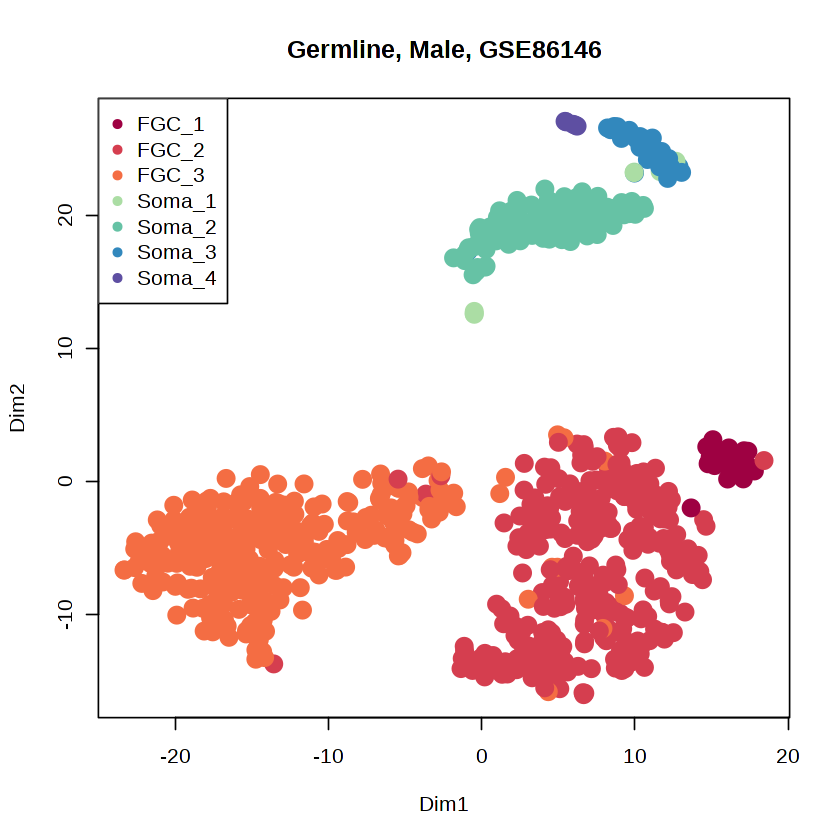

In [6]:
# Creating a SingleCellExperiment object
data(GermMale)
data(labelGermMale)
data(tsneGermMale)

sce <- SingleCellExperiment(assays=list(counts = GermMale))
reducedDims(sce) <- SimpleList(TSNE=tsneGermMale$Y)
plot(reducedDims(sce)[[1]], col=labelGermMale, pch=16, cex=2,
  xlab="Dim1", ylab="Dim2", main="Germline, Male, GSE86146")
legend("topleft", legend=c(paste0("FGC_", 1:3), paste0("Soma_", 1:4)),
  col=c("#9E0142", "#D53E4F", "#F46D43", "#ABDDA4", "#66C2A5", "#3288BD", "#5E4FA2"),
  pch=16)

To perform the tensor decomposition and HTML report, user is supposed to specify

1. LRBase.XXX.eg.db
2. color vector of each cell
3. cell type vector of each cell

to *SingleCellExperiment* object. The corresponding information is registered to the metadata slot of *SingleCellExperiment* object by *cellCellSetting* function.

In [7]:
cellCellSetting(sce, LRBase.Hsa.eg.db, names(labelGermMale))

After *cellCellSetting*, we can perform tensor decomposition by *cellCellDecomp*. Here the parameter *ranks* is specified as dimension of core tensor. For example, *c(2, 3)* means The data tensor is decomposed to 2 ligand-patterns and 3 receptor-patterns.

Although user has to specify the *rank* to perform *cellCellDecomp*, we implemented a simple rank estimation function based on the eigenvalues distribution of PCA in the matricised tensor in each mode in *cellCellRank*. rks$selected is also specified as rank parameter of *cellCellDecomp*.

In [10]:
rks <- cellCellRanks(sce)
rks

Each rank, multiple NMF runs are performed
  |======================================================================| 100%
Each rank estimation method
  |======================================================================| 100%
Each rank, multiple NMF runs are performed
  |======================================================================| 100%
Each rank estimation method
  |======================================================================| 100%


$RSS
$RSS$rss1
[1] 23.87077887 11.84085054  5.37104798  1.63638150  1.14435161  0.81261367
[7]  0.06953053

$RSS$rss2
[1] 27.0564927 13.3103395  4.1383954  2.3060557  1.4718549  0.7876528  0.1109587


$selected
[1] 4 3

In [11]:
cellCellDecomp(sce, ranks=c(4,3))

Input data matrix may contains 7 gene symbols because the name contains some alphabets.
scTensor uses only NCBI Gene IDs for now.
Here, the gene symbols are removed and remaining 235 NCBI Gene IDs are used for scTensor next step.

7 * 7 * 145 Tensor is created



If *cellCellDecomp* is properly finished, we can perform *cellCellReport* function to output the HTML report like below. After *cellCellReport*, multiple R markdown files, compiled HTML files, figures, and R binary file containing the result of analysis are saved to *out.dir*. 

In [13]:
cellCellReport(sce, "TSNE")

Warning message:
"DEPRECATION: As of AnnotationHub (>2.23.2), default caching location has changed.
  Problematic cache: /home/zihong/.cache/AnnotationHub
  See https://bioconductor.org/packages/devel/bioc/vignettes/AnnotationHub/inst/doc/TroubleshootingTheCache.html#default-caching-location-update
"
snapshotDate(): 2021-05-18

downloading 1 resources

retrieving 1 resource

loading from cache

Could not check id: AH92581 for updates.
  Using previously cached version.

Loading required package: AnnotationDbi

Related gene names are retrieved from AnnotationHub...

'select()' returned 1:1 mapping between keys and columns

Related gene descriptions are retrieved from AnnotationHub...

'select()' returned 1:1 mapping between keys and columns

Related GO IDs are retrieved from AnnotationHub...

'select()' returned 1:many mapping between keys and columns

Related Ensembl Gene IDs are retrieved from AnnotationHub...

'select()' returned 1:many mapping between keys and columns

Related Ensem

Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecate

Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecated.
Use 'plot_hexbin_feature' instead.
See help("Deprecated")"
Warning message:
"'schex::plot_hexbin_gene' is deprecate

GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)


Loading required package: org.Hs.eg.db



DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)


--> No gene can be mapped....

--> Expected input gene ID: 1770,10019,3371,8030,673,3110

--> return NULL...



DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)


--> No gene can be mapped....

--> Expected input gene ID: 84441,8216,472,863,7170,5187

--> return NULL...



DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(2/3)


'select()' returned 1:many mapping between keys and columns



GO-Enrichment Analysis is running...(3/3)


'select()' returned 1:many mapping between keys and columns



MeSH-Enrichment Analysis is running...(1/16)
MeSH-Enrichment Analysis is running...(2/16)
MeSH-Enrichment Analysis is running...(3/16)
MeSH-Enrichment Analysis is running...(4/16)
MeSH-Enrichment Analysis is running...(5/16)
MeSH-Enrichment Analysis is running...(6/16)
MeSH-Enrichment Analysis is running...(7/16)
MeSH-Enrichment Analysis is running...(8/16)
MeSH-Enrichment Analysis is running...(9/16)
MeSH-Enrichment Analysis is running...(10/16)
MeSH-Enrichment Analysis is running...(11/16)
MeSH-Enrichment Analysis is running...(12/16)
MeSH-Enrichment Analysis is running...(13/16)
MeSH-Enrichment Analysis is running...(14/16)
MeSH-Enrichment Analysis is running...(15/16)
MeSH-Enrichment Analysis is running...(16/16)
Reactome-Enrichment Analysis is running...(1/1)
DO-Enrichment Analysis is running...(1/1)
NCG-Enrichment Analysis is running...(1/1)
DGN-Enrichment Analysis is running...(1/1)
Hyper-links are embedded...


ligand.Rmd is created...

receptor.Rmd is created...

ligand_all.Rmd is created...

receptor_all.Rmd is created...

ligand.Rmd is compiled to ligand.html...

ligand_all.Rmd is compiled to ligand_all.html...

receptor.Rmd is compiled to receptor.html...

receptor_all.Rmd is compiled to receptor_all.html...

12 pattern_X_Y.Rmd files are compiled to pattern_X_Y.html :




pattern_1_1.Rmd is created...


pattern_1_1.Rmd is compiled to pattern_1_1.html




pattern_1_3.Rmd is created...


pattern_1_3.Rmd is compiled to pattern_1_3.html




pattern_2_3.Rmd is created...


pattern_2_3.Rmd is compiled to pattern_2_3.html




pattern_2_1.Rmd is created...


pattern_2_1.Rmd is compiled to pattern_2_1.html




pattern_4_2.Rmd is created...


pattern_4_2.Rmd is compiled to pattern_4_2.html




pattern_1_2.Rmd is created...


pattern_1_2.Rmd is compiled to pattern_1_2.html




pattern_4_3.Rmd is created...


pattern_4_3.Rmd is compiled to pattern_4_3.html




pattern_4_1.Rmd is created...


pattern_4_1.Rmd is compiled to pattern_4_1.html




pattern_2_2.Rmd is created...


pattern_2_2.Rmd is compiled to pattern_2_2.html




pattern_3_2.Rmd is created...


pattern_3_2.Rmd is compiled to pattern_3_2.html




pattern_3_1.Rmd is created...


pattern_3_1.Rmd is compiled to pattern_3_1.html




pattern_3_3.Rmd is created...


pattern_3_3.Rmd is compiled to pattern_3_3.html


index.Rmd is created...

index.Rmd is compiled to index.html...


################################################
Data files are saved in
/tmp/RtmpOExj28
################################################




After the HTML files are created, we can explore all the information with the *index.html*.

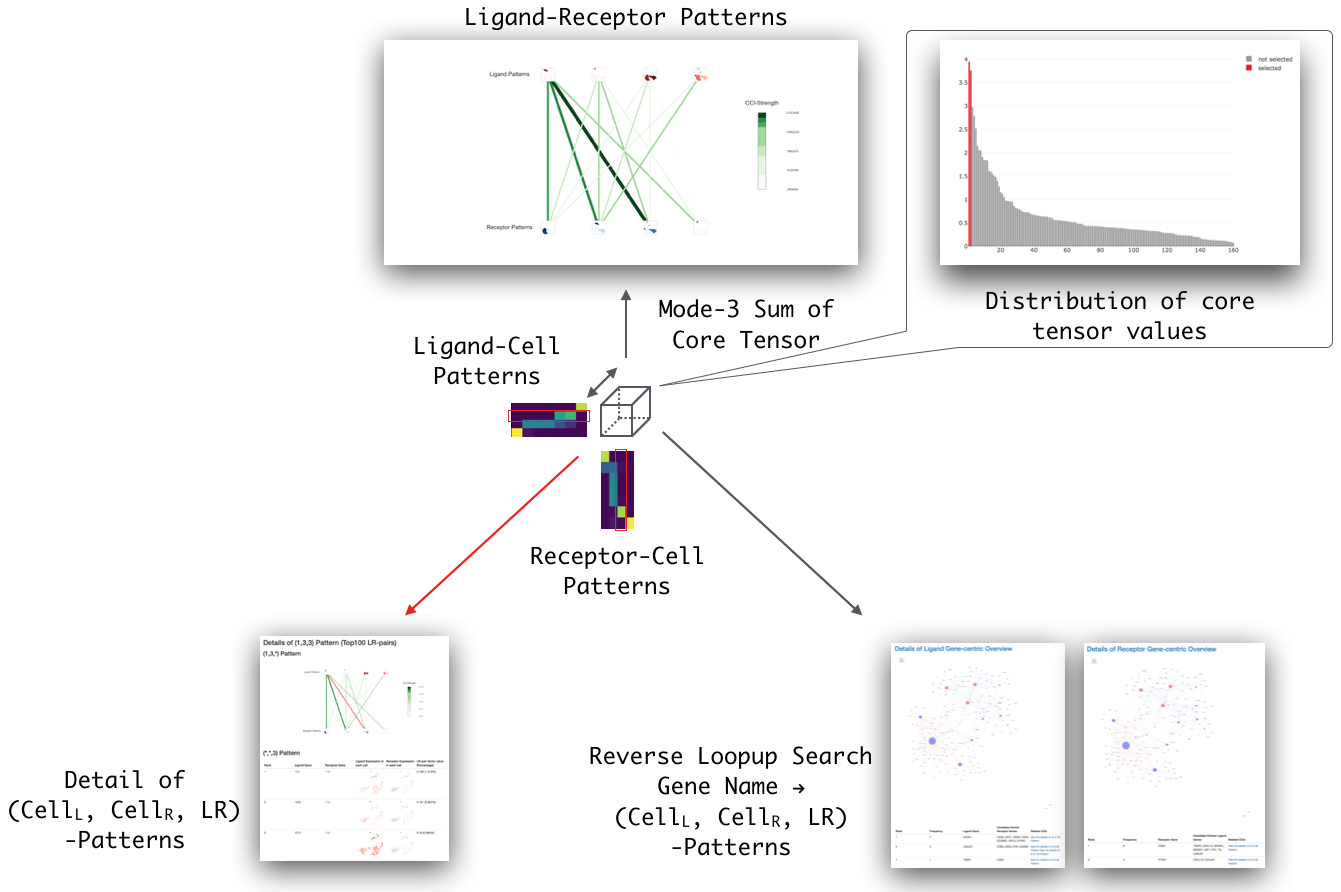

Last updated: June 12,2021